In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.utils.data import random_split, DataLoader
from torchvision import transforms

In [2]:
import os, sys
sys.path.append(os.path.abspath('../src'))

from tagseg.data.acdc_dataset import AcdcDataSet, Patient

In [3]:
acdc_filepath = Path('../data/01_raw/acdc-training')

example = acdc_filepath / 'patient002' / 'patient002_frame01.nii.gz'
example_gt = acdc_filepath / 'patient002' / 'patient002_frame01_gt.nii.gz'

In [4]:
patient_path = str(acdc_filepath / 'patient002')

In [5]:
%%bash -s "$patient_path"
cd $1 && ls -l

total 18372
-rw-r--r-- 1 root root       63 Mar 23 01:20 Info.cfg
-rwxr-x--- 1 root root 17559867 Mar 23 01:20 patient002_4d.nii.gz
-rw-r--r-- 1 root root   612701 Mar 23 01:20 patient002_frame01.nii.gz
-rw-r--r-- 1 root root     7259 Mar 23 01:20 patient002_frame01_gt.nii.gz
-rw-r--r-- 1 root root   614016 Mar 23 01:20 patient002_frame12.nii.gz
-rw-r--r-- 1 root root     6485 Mar 23 01:20 patient002_frame12_gt.nii.gz


In [6]:
patient = Patient(patient_path)

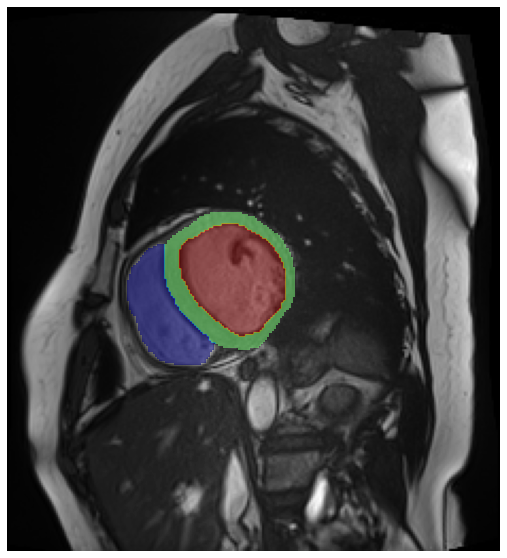

In [11]:
plt.figure(figsize=(10, 10))

plt.imshow(patient.images[1][1], cmap='gray')
plt.imshow(np.ma.masked_where(patient.masks[1][1] == 0, patient.masks[1][1]), cmap='jet', alpha=0.5)
plt.axis('off')

plt.show()

In [ ]:
# mask = gt[:, :, 0]
# mask = mask.astype(np.float64)

# tt = transforms.ToTensor()
# rs = transforms.Resize((256, 256), interpolation=transforms.InterpolationMode.NEAREST)

# mask = rs(tt(mask)).unique().numpy()

In [ ]:
# fig, ax = plt.subplots(10, 3, figsize=(15, 30))

# for i in range(10):
#     ax[i, 0].imshow(imt[:, :, i], cmap='gray')
#     ax[i, 1].imshow(gt[:, :, i])
#     ax[i, 2].imshow(sim_gridtag(imt[:, :, i] ** 0.4, 5), cmap='gray')

In [ ]:
# p = Patient(acdc_filepath / 'patient001')

In [12]:
load_args = dict(only_myo=True, filepath_raw='../data/01_raw/acdc-training')
dataset = AcdcDataSet(filepath='../data/03_primary/acdc_train.pt', load_args=load_args).load()

In [13]:
len(dataset)

1828

In [ ]:
len(dataset)

In [ ]:
new_dataset = AcdcDataSet(filepath='../data/03_primary/acdc_train.pt', load_args=load_args)._load_except(**load_args)

In [ ]:
len(new_dataset)

In [ ]:
image, mask = dataset[0]

In [ ]:
image.isnan().sum(), mask.isnan().sum()

In [ ]:
set(label.unique().numpy()).issubset(set([0, 1, 2, 3]))

In [ ]:
not all([_class in [0., 1., 2., 3.] for _class in label.unique()])

In [ ]:
means, stds = zip(*[(img[0][0].mean().item(), img[0][0].std().item()) for img in dataset])

In [ ]:
plt.hist(means[1:])

In [ ]:
fix, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(dataset[212][0][0, ...], cmap='gray'), ax[0].axis('off')
ax[1].imshow(dataset[212][1][...]), ax[1].axis('off')

plt.show()